# Linear Regression Assignment - BoomBikes Bike Sharing

## Problem Statement

BoomBikes, a US bike-sharing provider, has faced substantial revenue declines during the COVID-19 pandemic. Struggling to survive in the current market, they aim to boost revenue when lockdowns ease and the economy recovers. Their objective is to understand post-pandemic bike demand and outshine competitors, leading to substantial profits. BoomBikes has enlisted a consulting firm to identify the crucial variables influencing shared bike demand in the American market. They seek to determine which variables significantly impact demand and how effectively these variables explain bike demand fluctuations. To achieve this, BoomBikes has amassed a comprehensive dataset that includes daily bike demand data and meteorological surveys, paving the way for data-driven strategies to thrive in a post-pandemic environment.

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding the Data

In [1]:
# Supressing Warnings.

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [5]:
# Reading the dataset.

df = pd.read_csv("day.csv")

In [6]:
# Checking the first 5 rows of the dataset.

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspecting the various aspects of the  dataframe

In [7]:
df.shape

(730, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


* Dataset contains 730 rows and 16 columns.
* There are no missing values in the dataset.
* Column - 'dteday' contains object data type ; all other columns have either int or float values.
* Even though some of the columns contain values that are categorical in nature, they are represented by int/float       values. 

#### Removing unwanted columns

The following columns may be removed from the dataset:
* instant   - contains row index.
* dteday    - contains date but since the dataset already has columns - 'yr' and 'mnth', dteday may be removed.
* casual & registered   - these columns are the breakup by category for the column - 'cnt'. Hence it may be removed.

In [10]:
# Removing unwanted columns.

df.drop(labels=['instant','dteday','casual','registered'],axis=1,inplace=True)
df.shape

(730, 12)

#### Replacing all non-binary categorical column values by their original values as per the data dictionary

In [11]:
# Season column.
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Month column.
df.mnth = pd.to_datetime(df.mnth,format='%m').dt.month_name()

# Weekday column.
df.weekday = df.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

#  Weathersit column.
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Checking the column info of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising the Data

#### Visualising Numeric Variables

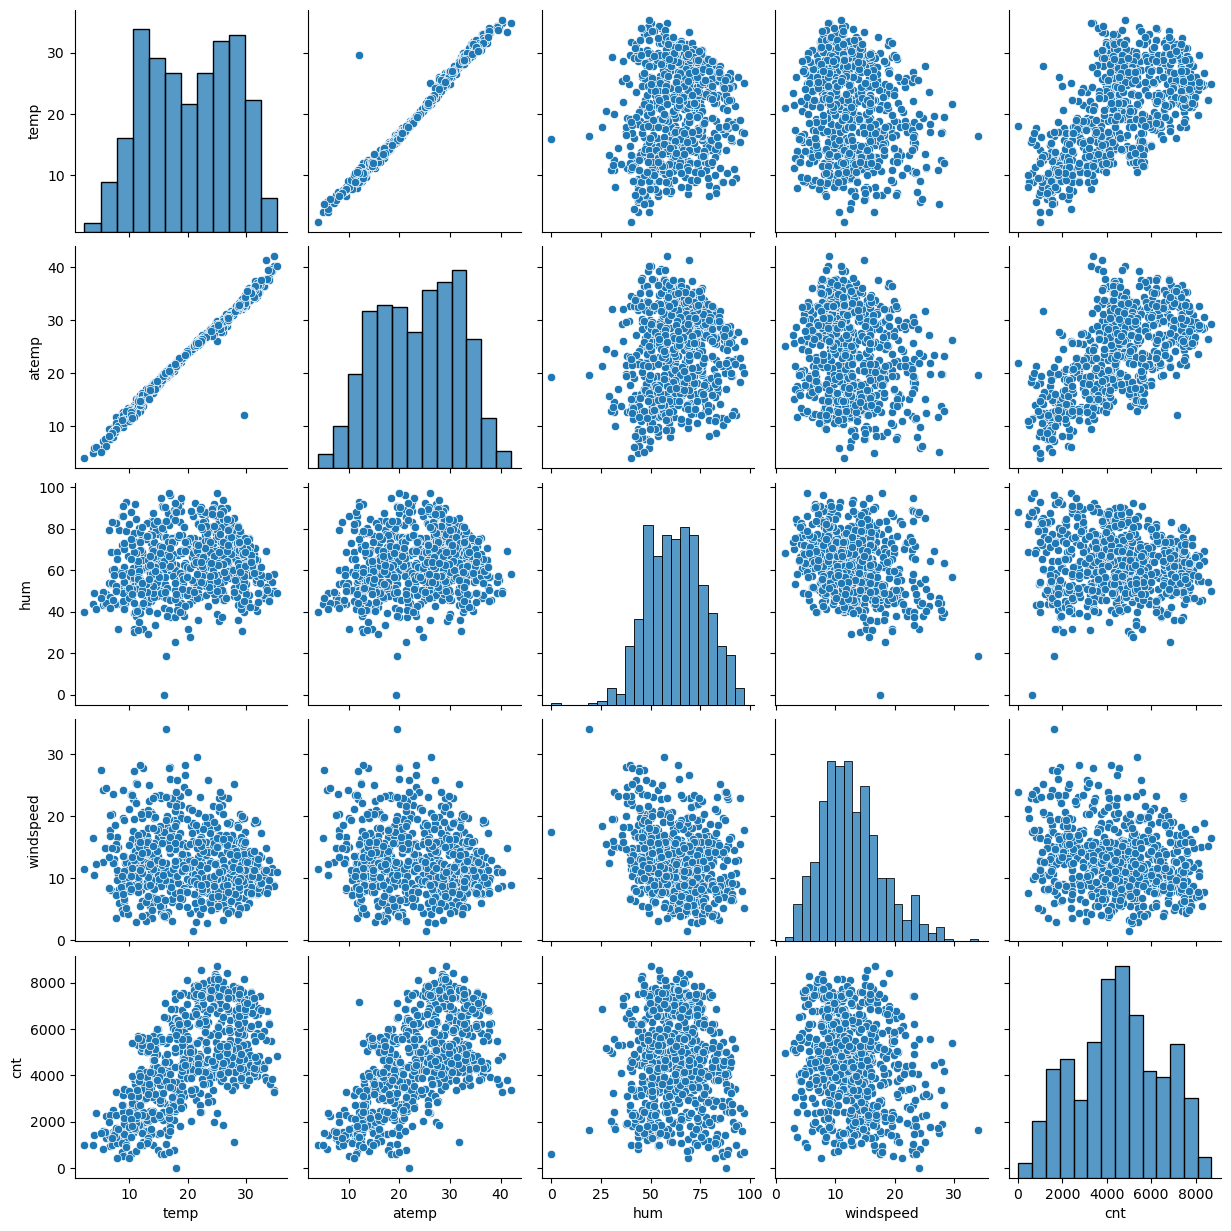

In [13]:
# Visualising the numeric variables of the dataset using pairplot.

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

* There seems to be a linear relationship between 'temp', 'atemp' and 'cnt'.

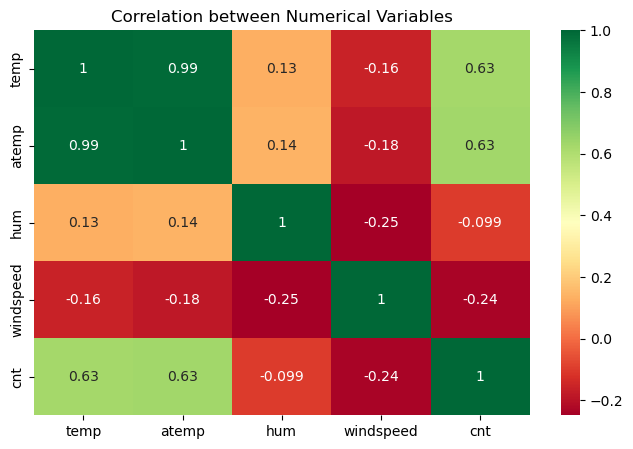

In [14]:
# Checking the correlation between the numerical variables.

plt.figure(figsize = (8,5))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

* There seems to be a linear relationship between temp and atemp. But both these variables cannot be used in the model due to multicolinearity. 

#### Visualising Categorical Variables

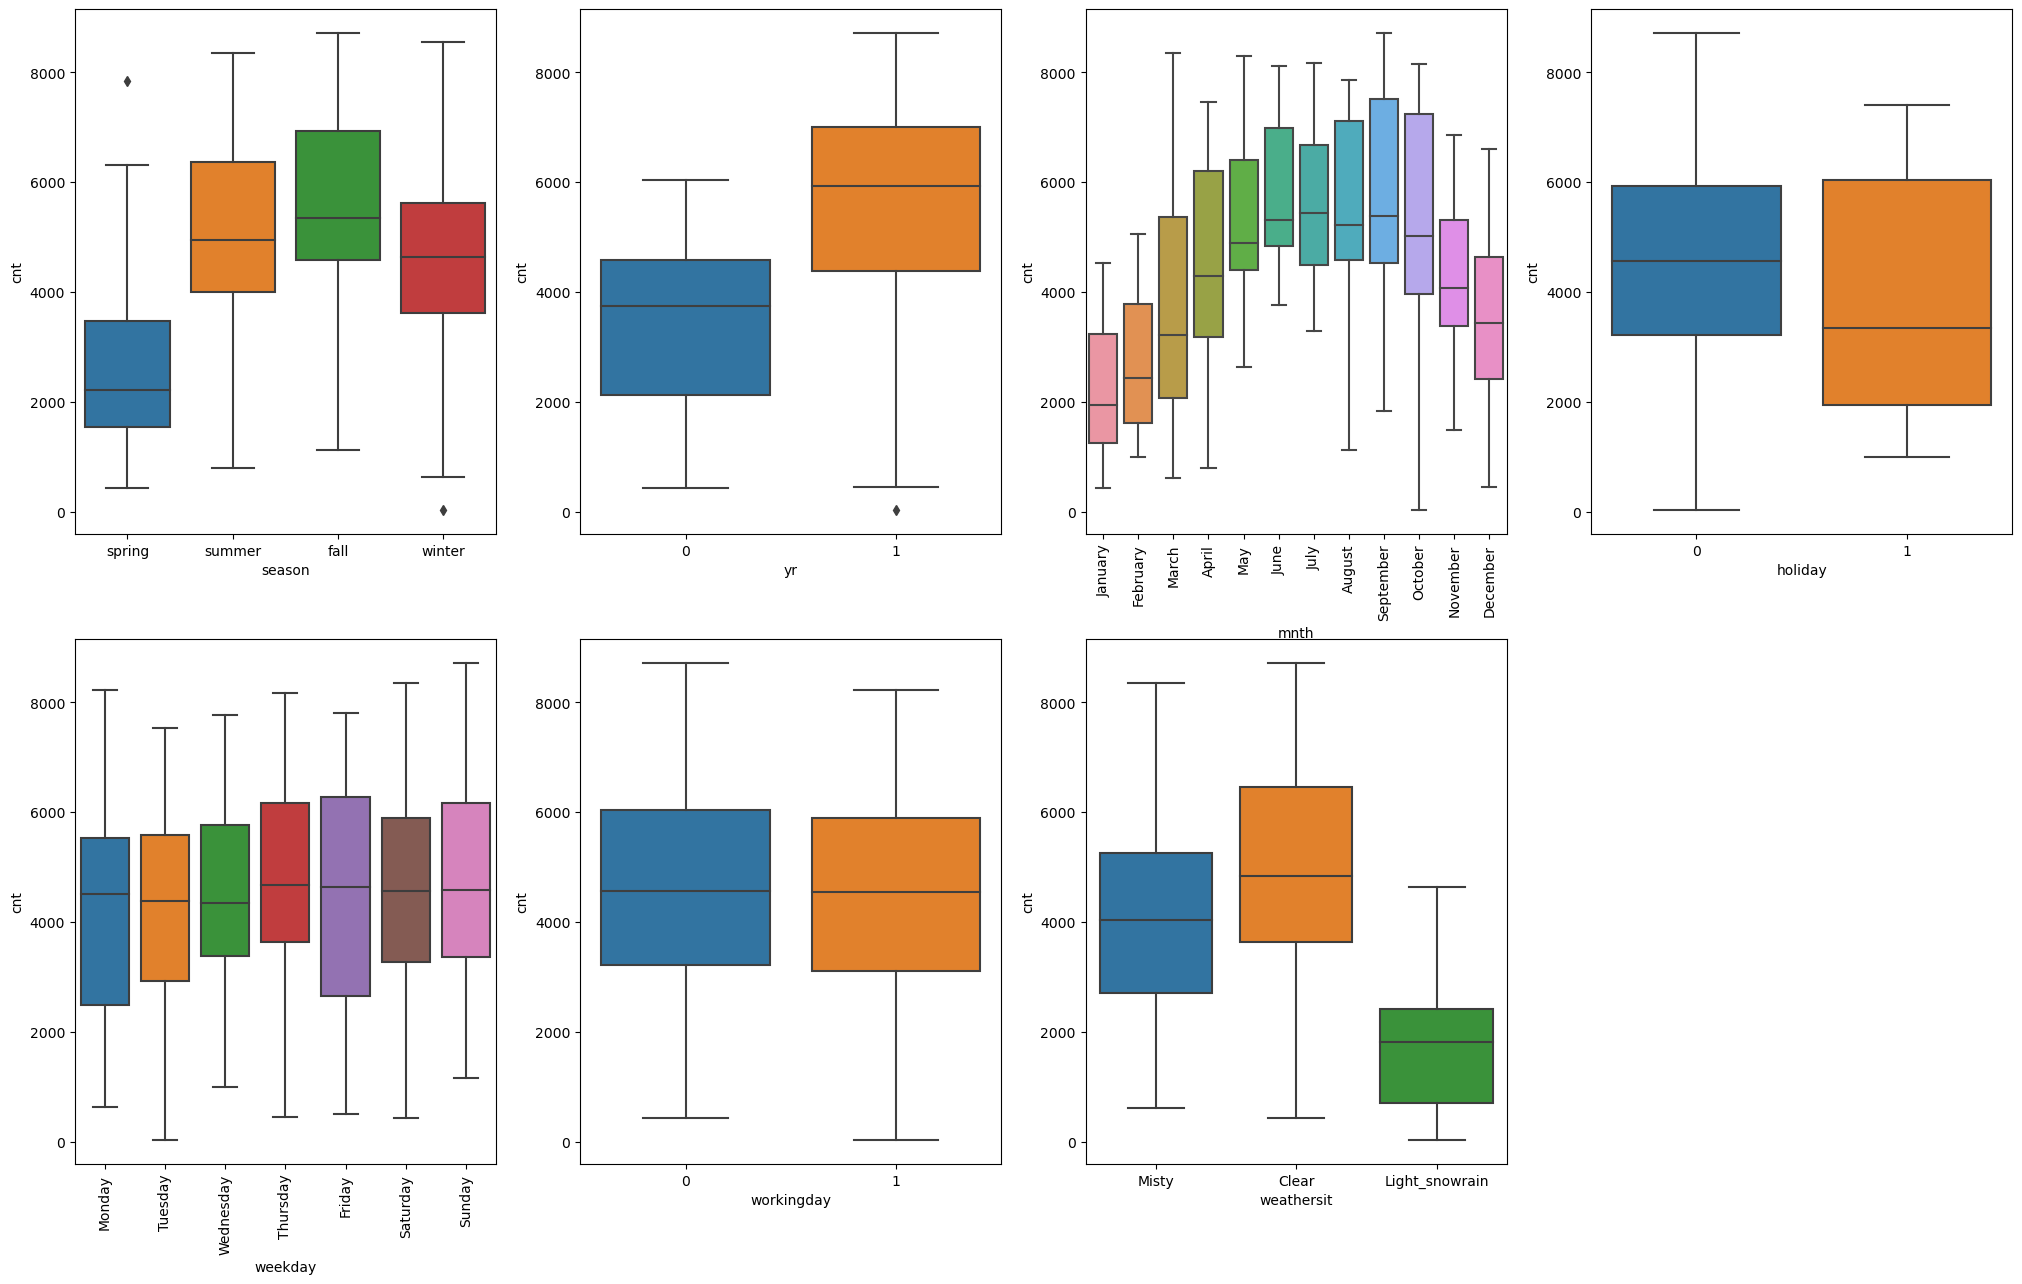

In [15]:
# Visualising the categorical variables of the dataset against the target variable 'cnt' using boxplot.

plt.figure(figsize=(25, 15))

plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(2, 4, 3)
ax = sns.boxplot(x='mnth', y='cnt', data=df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2, 4, 5)
ax = sns.boxplot(x='weekday', y='cnt', data=df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=df)


plt.show()

* Season      - Most number of bike rentals were in Fall and Summer seasons.
* Yr          - Number of bike rentals were higher in 2019 compared to 2018.
* Mnth        - While considering months, most number of bike rentals were in the months of May - October.
* Holiday     - Number of bike rentals were higher on holidays than on regular days.
* Weekday     - Weekday variables shows a very close trend with an almost similiar median of 4000 - 5000. Most number                 of bike rentals were on Thursday to Sunday towards the end of the week.
* Workingday  - Number of bike rentals were almost similiar on whether it's a working day or not.
* Weathersit  - Most number of bike rentals were in clear weather.

## Data Preparation


#### Dummy Variables

In [16]:
# Creating dummy variables for season, month, weekday and weathersit.

season = pd.get_dummies(df.season, drop_first=True)
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)

In [17]:
# Merging  the dummy variables with the original dataset.

df1 = pd.concat([df,season,month,weekday,weathersit], axis = 1)

In [18]:
# Dropping the variables season, mnth, weekday and weathersit as we have already created dummy variables out of them.

df1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

#### Inspecting the various aspects of the new dataframe

In [19]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df1.shape

(730, 30)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  August          730 non-null    uint8  
 12  December        730 non-null    uint8  
 13  February        730 non-null    uint8  
 14  January         730 non-null    uint8  
 15  July            730 non-null    uint8  
 16  June            730 non-null    uint8  
 17  March           730 non-null    uin

## Splitting the data into training and testing sets

In [22]:
# Splitting the dataset into train and test sets.

df_train, df_test = train_test_split(df1, train_size=0.7, random_state=100)

In [23]:
# Checking the shape of the training dataset.

df_train.shape

(510, 30)

In [24]:
# Checking the shape of the test dataset.

df_test.shape

(220, 30)

In [25]:
# Using MinMaxScaler to Rescaling the features.

scaler = MinMaxScaler()

In [26]:
# Applying Scaler to all the numeric variables.

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
# Checking the normalised values of the train set after performing scaling.

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The max value of all the variables have been re-scaled to 1.

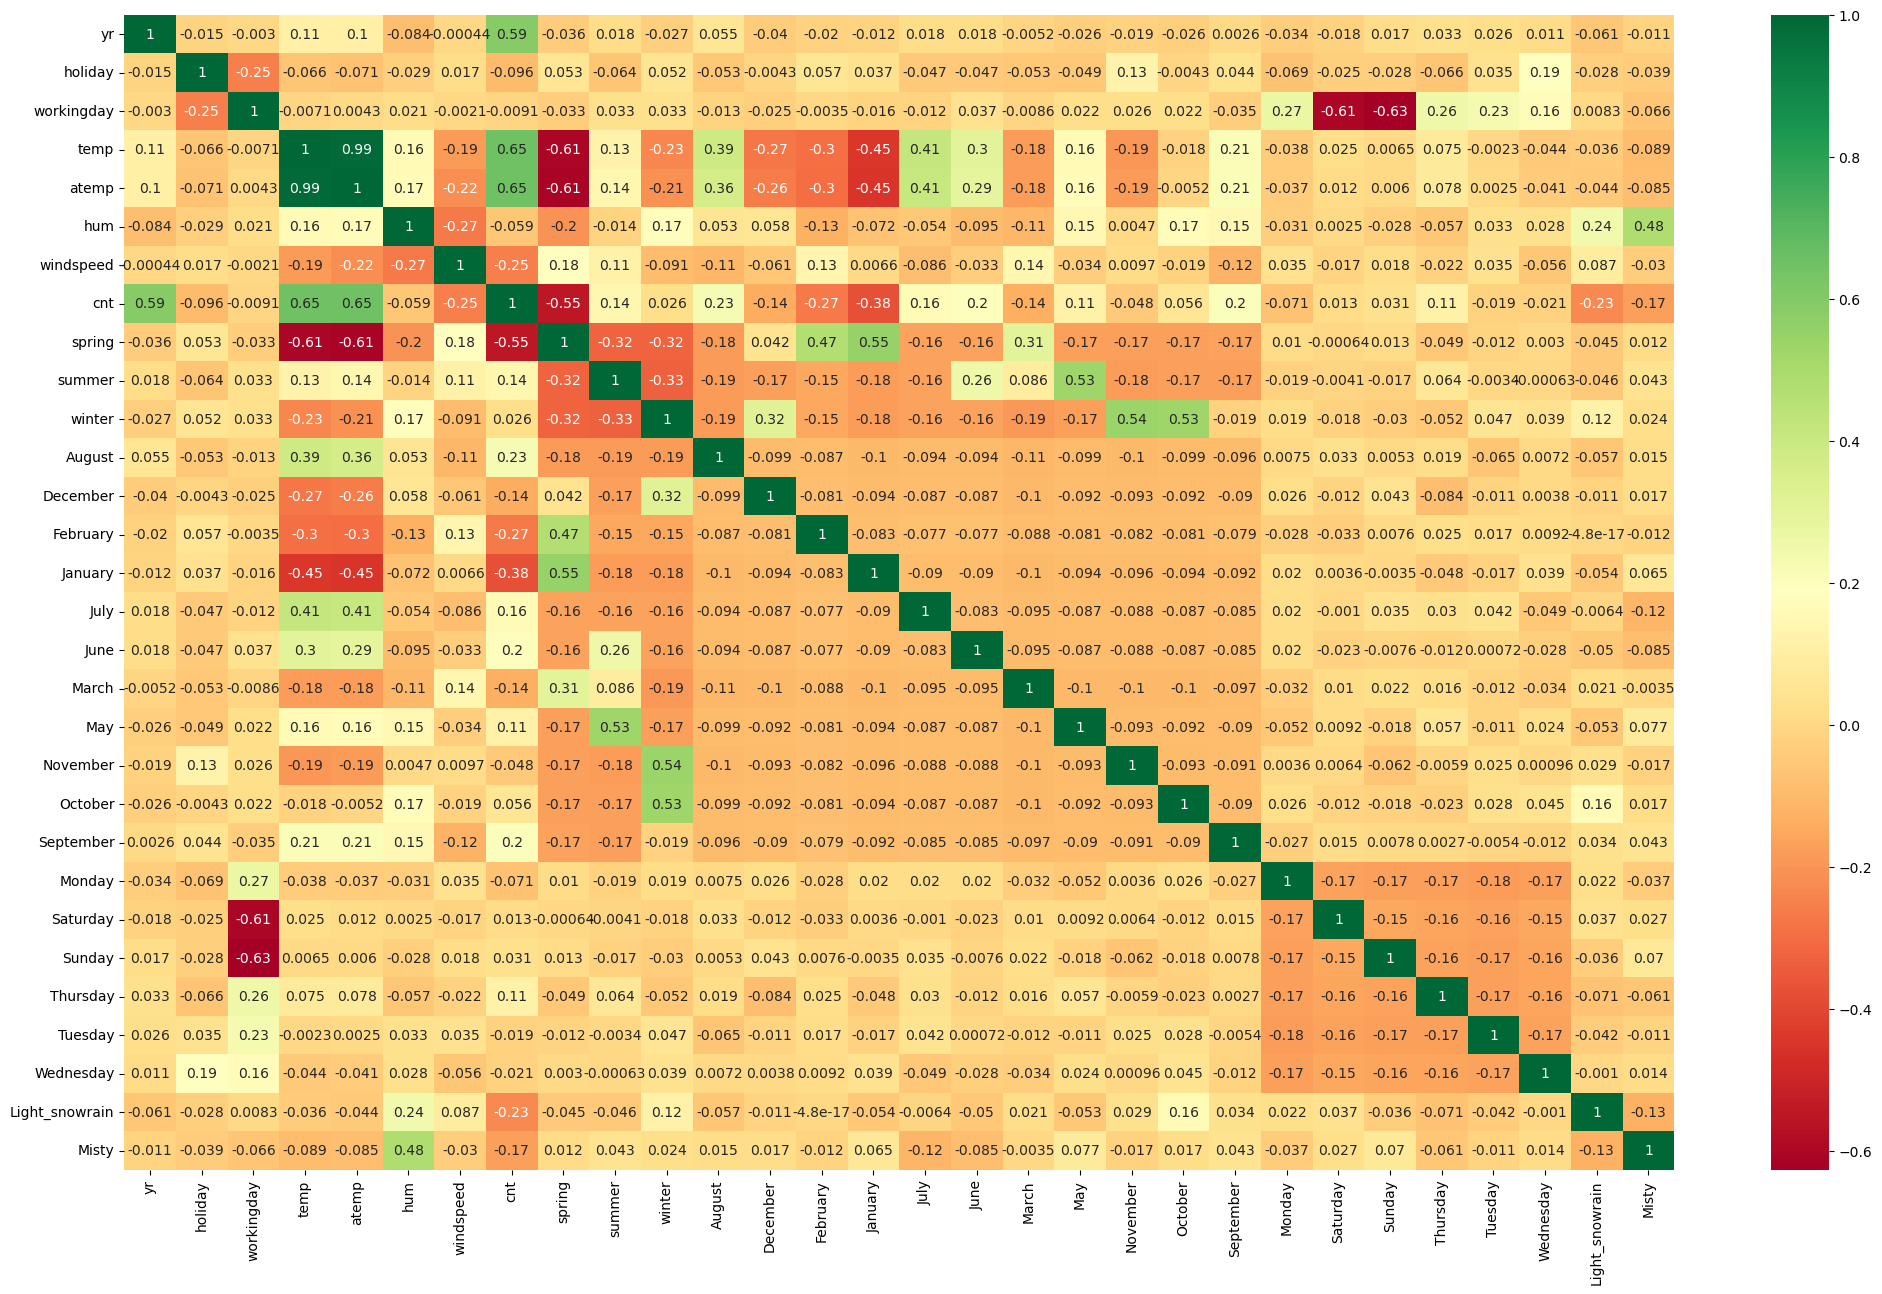

In [28]:
# Checking the correlation coefficient to see which variables are highly correlated post data preparation and rescaling.

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), cmap="RdYlGn", annot=True)
plt.show()

'temp' and 'yr' variables are highly correlated with the target variable 'cnt'.

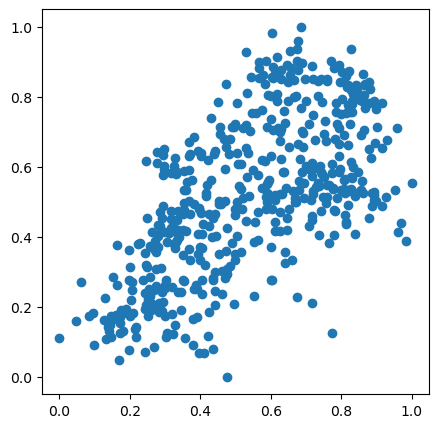

In [29]:
# Visualising the correlation between cnt and temp variables using a scatter plot to see the trends.

plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

The scatter plot confirms the positive corelation betwen temp and cnt variables.

#### Dividing into X and y sets for the model building.

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

### Feature Selection

In [31]:
# Running RFE with an output number of the variables equal to 15.

lm = LinearRegression()
lm1 = lm.fit(X_train,y_train)

# Setting feature selection variables to 15.

rfe = RFE(lm,n_features_to_select=15) 

# Fitting RFE object on training dataset.

rfe = rfe.fit(X_train,y_train)

In [32]:
# Listing out the variables selected in the top 15.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [33]:
# Storing the selected variables by RFE to a list.

vars_rfe = X_train.columns[rfe.support_]
vars_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light_snowrain', 'Misty'],
      dtype='object')

In [34]:
# Checking the variables not picked by RFE.

vars_not_selected = X_train.columns[~rfe.support_]
vars_not_selected

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [35]:
# Creating training set with RFE selected variables.

X_train_rfe = X_train[vars_rfe]

## Building a Linear Model

#### Model 1

In [36]:
# Adding a constant to the training variables.

X1 = sm.add_constant(X_train_rfe)

# Building the first Linear Regression Model with RFE selected variables.

lm1 = sm.OLS(y_train, X1).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          8.15e-189
Time:                        21:33:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

#### VIF Check

In [37]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,November,1.77
10,January,1.68
15,Misty,1.57
9,December,1.50


* VIF values seem good.
* VIF of spring is 5.27.
* None of the p-values are greater than 0.05.

#### Model 2

Removing 'spring' variable and updating the model.

In [38]:
X2 = X_train_rfe.drop(['spring'], axis = 1)
X2.head()

,yr,holiday,temp,hum,windspeed,summer,winter,December,January,July,November,September,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


In [39]:
# Adding a constant to the training variables.

X2 = sm.add_constant(X2)

# Building a Linear Regression Model.

lm2 = sm.OLS(y_train, X2).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          3.50e-188
Time:                        21:33:37   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2562      0.029      8.

In [40]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
11,November,1.71
9,January,1.67
14,Misty,1.55
8,December,1.48
6,summer,1.44
10,July,1.43


* p-values of November and December are 0.122 & 0.093 respectively.
* VIF of all variables are less than 5.

#### Model 3

Removing 'November' variable and creating a new model.

In [41]:
X3 = X_train_rfe.drop(['November'], axis = 1)
X3.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,December,January,July,September,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [42]:
# Adding a constant to the training variables.

X3 = sm.add_constant(X3)

# Building a Linear Regression Model.

lm3 = sm.OLS(y_train, X3).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          4.71e-189
Time:                        21:34:32   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3036      0.035      8.

In [43]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,78.66
6,spring,5.10
3,temp,4.14
8,winter,3.59
7,summer,2.69
4,hum,1.92
10,January,1.65
14,Misty,1.56
11,July,1.49
12,September,1.31


* p-value of December is 0.190 which is greater than 0.05.
* VIF of spring has been reduced slightly.

#### Model 4

Removing 'December' variable and updating the model.

In [44]:
X4 = X_train_rfe.drop(['November','December'], axis = 1)
X4.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,January,July,September,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1


In [45]:
# Adding a constant to the training variables.

X4 = sm.add_constant(X4)

# Building a Linear Regression Model.

lm4 = sm.OLS(y_train, X4).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          7.59e-190
Time:                        21:34:45   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2964      0.035      8.

In [46]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,76.76
6,spring,5.08
3,temp,3.89
8,winter,3.59
7,summer,2.65
4,hum,1.90
9,January,1.57
13,Misty,1.56
10,July,1.49
11,September,1.30


* p-value of January is 0.059 which is greater than 0.05.

#### Model 5

Removing 'January' variable and updating the model.

In [47]:
X5 = X_train_rfe.drop(['November','December','January'], axis = 1)
X5.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,July,September,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,1


In [48]:
# Adding a constant to the training variables.

X5 = sm.add_constant(X5)

# Building a Linear Regression Model.

lm5 = sm.OLS(y_train, X5).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          2.95e-190
Time:                        21:34:57   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

In [49]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,74.37
6,spring,5.02
3,temp,3.61
8,winter,3.48
7,summer,2.62
4,hum,1.89
12,Misty,1.56
9,July,1.48
10,September,1.30
11,Light_snowrain,1.24


* VIF of spring is 5.02 and p-value is 0.007.

#### Model 6

Removing 'spring' variable and updating the model.

In [50]:
X6 = X_train_rfe.drop(['November','December','January','spring'], axis = 1)
X6.head()

,yr,holiday,temp,hum,windspeed,summer,winter,July,September,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1


In [51]:
# Adding a constant to the training variables.

X6 = sm.add_constant(X6)

# Building a Linear Regression Model.

lm6 = sm.OLS(y_train, X6).fit()

# Printing the summary of the Linear Regression Model obtained.

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          6.89e-190
Time:                        21:35:13   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2262      0.027      8.

In [52]:
# Creating a dataset which contains the names of all the feature variables and their VIFs.

vif = pd.DataFrame()
vif['Feature'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,Misty,1.55
8,July,1.43
6,summer,1.33
7,winter,1.29
10,Light_snowrain,1.24
9,September,1.19
5,windspeed,1.18


* Now in this model, the p-values and VIFs both are within an acceptable range. 
* The R-squared value achieved is 84.0% which suggests a high correlation between the dependent variable (count) and the independent variables.

#### Hence this model can be considered as our final model and can go ahead and make predictions using this model.

## Residual Analysis of the train data

In [53]:
y_train_cnt = lm6.predict(X6)

Text(0.5, 0, 'Errors')

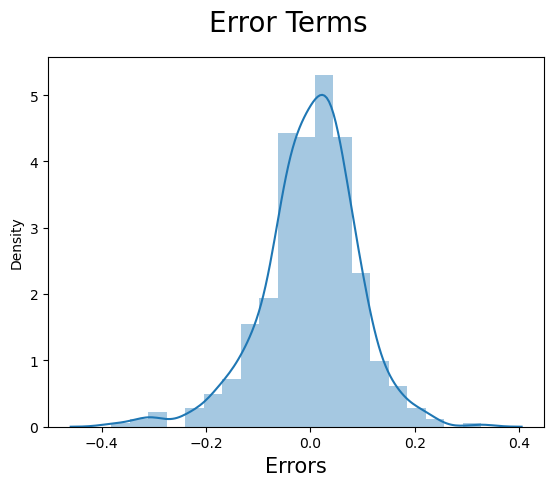

In [54]:
# Plotting a histogram for the error terms.

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 15) 

From the above histogram, it is evident that the Error Terms are following a normal distribution. Hence the appropriateness of the model is assured.

## Making predictions using the final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model, i.e. Model 6.

In [55]:
# Applying scaler() to all the numeric variables in the test dataset.

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
df_test = df_test.drop(vars_not_selected,axis =1)

In [57]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,December,January,July,November,September,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.086364,0.077273,0.104545,0.072727,0.086364,0.027273,0.318182
std,0.500809,0.187620,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.281541,0.267633,0.306665,0.260281,0.281541,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Dividing into X_test and y_test.

y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Adding constant variable to the test dataset.

X_test_final = sm.add_constant(X_test)

In [60]:
# Dropping the variables that were not a part of the final model (Model 6).

X_test_final = X_test_final.drop(['November','December','January','spring'], axis = 1)

In [61]:
# Making predictions using the final model (Model 6).

y_pred = lm6.predict(X_test_final)

## Model Evaluation

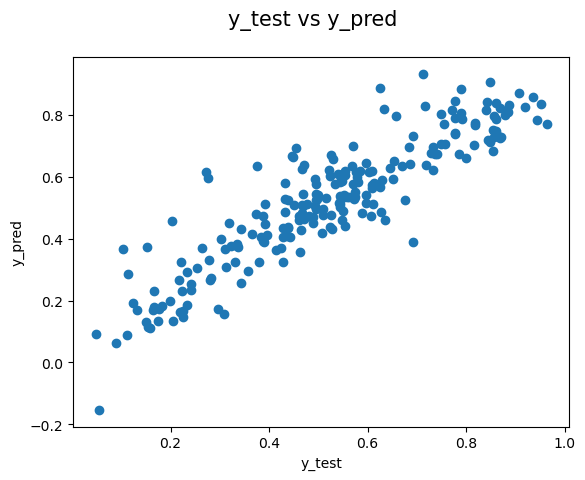

In [62]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)               
plt.xlabel('y_test', fontsize=10)                         
plt.ylabel('y_pred', fontsize=10) 
plt.show()

In [63]:
lm6.params

const             0.226223
yr                0.227954
holiday          -0.098909
temp              0.597749
hum              -0.184135
windspeed        -0.189481
summer            0.081529
winter            0.134695
July             -0.047814
September         0.096174
Light_snowrain   -0.231830
Misty            -0.050192
dtype: float64

Equation of the best fitted line is:

###### cnt = 0.227954 * yr - 0.098909 * holiday + 0.597749 * temp - 0.184135 * hum - 0.189481 * windspeed + 0.081529 * summer +  0.134695 * winter - 0.047814 * July + 0.096174 * September - 0.231830 * Light_snowrain - 0.050192 * Misty

In [64]:
# Calculating R-squared value for test.

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R squared value :',round(R2,3))

R squared value : 0.805


In [65]:
# Calculating Adj.R-squared value for test.

P = X_test_final.shape[1] - 1                           
N = X_test_final.shape[0]                               
Adj_R2 = 1 - (((1-R2)*(N-1))/(N-P-1))
print('Adj.R squared value :',round(Adj_R2,3))

Adj.R squared value : 0.795


### Comparision between Training and Testing dataset

* Train dataset R^2          : 0.840
* Test dataset R^2           : 0.805

* Train dataset Adjusted R^2 : 0.836   
* Test dataset Adjusted R^2  : 0.795

### Summary

Based on our final model (Model 6), the top 5 predictor variables that influences the number of bike rentals are :
1. temp (Coefficient value : 0.5977 - A unit increase in temp variable increases the number of bike rentals by 0.5977 units. )
2. light_snowrain (Coefficient value : -0.2318 - A unit increase in Light_snowrain variable decreases the number of bike rentals by 0.2318 units)
3. yr (Coefficient value : 0.2280 - A unit increase in yr variable increases the number of bike rentals by 0.2280 units. )
4. windspeed (Coefficient value : -0.1895 - A unit increase in windspeed variable decreases the number of bike rentals by 0.1895 units. )
5. hum (Coefficient value : -0.1841 - A unit increase in hum variable decreases the number of bike rentals by 0.1841 units. )

Hence it is recommended to focus on these variables while preparing marketing strategies to improve the number of bike rentals.